<a href="https://colab.research.google.com/github/ryanbaik0703/CSC422_World-University-Rankings-and-its-Correlation/blob/main/CSC422_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("mylesoneill/world-university-rankings")

print("Path to dataset files:", path)

# List files in the downloaded directory
print("Files in the downloaded directory:")
for root, dirs, files in os.walk(path):
    for name in files:
        print(os.path.join(root, name))

Using Colab cache for faster access to the 'world-university-rankings' dataset.
Path to dataset files: /kaggle/input/world-university-rankings
Files in the downloaded directory:
/kaggle/input/world-university-rankings/education_expenditure_supplementary_data.csv
/kaggle/input/world-university-rankings/educational_attainment_supplementary_data.csv
/kaggle/input/world-university-rankings/shanghaiData.csv
/kaggle/input/world-university-rankings/timesData.csv
/kaggle/input/world-university-rankings/cwurData.csv
/kaggle/input/world-university-rankings/school_and_country_table.csv


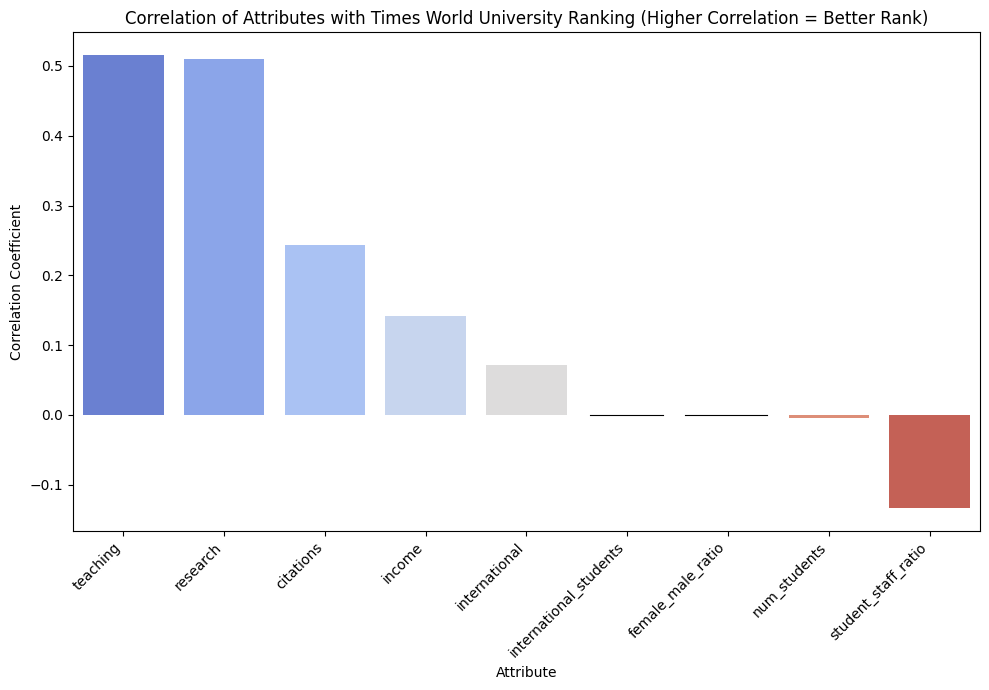

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select relevant columns from the Times dataset for correlation
# Exclude non-numeric columns and the university name/country
times_correlation_columns = ['world_rank', 'teaching', 'international', 'research',
                             'citations', 'income', 'num_students',
                             'student_staff_ratio', 'international_students', 'female_male_ratio'] # Removed 'total_score'

# Filter times_df to include only these columns and ensure they are numeric
times_corr_df = times_df[times_correlation_columns].copy()
for col in times_corr_df.columns:
    times_corr_df[col] = pd.to_numeric(times_corr_df[col], errors='coerce')
    times_corr_df[col] = times_corr_df[col].fillna(times_corr_df[col].mean()) # Fill NaNs for correlation


# Calculate the correlation matrix for the Times dataset
times_correlation_matrix = times_corr_df.corr()

# Select correlations with the world rank and flip the sign
times_world_rank_corr = -times_correlation_matrix['world_rank'].drop('world_rank') # Flipped the sign

# Define a custom order for better visualization of near-zero correlations, placing them to the left of num_students
custom_order = [
    'teaching', 'research', 'citations', 'income', 'international',
    'international_students', 'female_male_ratio', 'num_students', 'student_staff_ratio'
]

# Reindex the series according to the custom order
times_world_rank_corr = times_world_rank_corr.reindex(custom_order)


# Plot the correlations as a bar chart
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=times_world_rank_corr.index, y=times_world_rank_corr.values, palette='coolwarm', hue=times_world_rank_corr.index, legend=False)
plt.title('Correlation of Attributes with Times World University Ranking (Higher Correlation = Better Rank)')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Attribute')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add a thin line at y=0 for 'international_students' and 'female_male_ratio'
zero_correlation_attributes = {
    'international_students': {'xmin': -0.05, 'xmax': 0.75}, # Example values, adjust as needed
    'female_male_ratio': {'xmin': -0.25, 'xmax': 0.65} # Example values, adjust as needed
}

for attribute, coords in zero_correlation_attributes.items():
    if attribute in times_world_rank_corr.index:
        x_pos = times_world_rank_corr.index.get_loc(attribute)
        # Calculate xmin and xmax based on the attribute's position and desired length
        # The values in the dictionary are now proportions of the bar width
        bar_width = 0.8 # Default bar width in seaborn barplot
        total_width = len(times_world_rank_corr) - 1
        xmin_abs = (x_pos - bar_width/2 + bar_width * coords['xmin']) / total_width
        xmax_abs = (x_pos - bar_width/2 + bar_width * coords['xmax']) / total_width

        ax.axhline(0, color='black', linestyle='-', linewidth=0.8, xmin=xmin_abs, xmax=xmax_abs)


plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub # Ensure kagglehub is imported here

# Re-obtain the dataset path to ensure it's in scope
path = kagglehub.dataset_download("mylesoneill/world-university-rankings")

# Load the shanghaiData.csv file using the newly obtained 'path'
shanghai_df = pd.read_csv(os.path.join(path, 'shanghaiData.csv'))

# Display information about the DataFrame to understand its structure and column names
print(shanghai_df.info())

# Display the first few rows to preview the data
display(shanghai_df.head())

100%|██████████| 1.41M/1.41M [00:00<00:00, 115MB/s]

Extracting files...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4897 entries, 0 to 4896
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   world_rank       4897 non-null   object 
 1   university_name  4896 non-null   object 
 2   national_rank    4896 non-null   object 
 3   total_score      1101 non-null   float64
 4   alumni           4896 non-null   float64
 5   award            4895 non-null   float64
 6   hici             4895 non-null   float64
 7   ns               4875 non-null   float64
 8   pub              4895 non-null   float64
 9   pcp              4895 non-null   float64
 10  year             4897 non-null   int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 421.0+ KB
None


,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
0,1,Harvard University,1,100.0,100.0,100.0,100.0,100.0,100.0,72.4,2005
1,2,University of Cambridge,1,73.6,99.8,93.4,53.3,56.6,70.9,66.9,2005
2,3,Stanford University,2,73.4,41.1,72.2,88.5,70.9,72.3,65.0,2005
3,4,"University of California, Berkeley",3,72.8,71.8,76.0,69.4,73.9,72.2,52.7,2005
4,5,Massachusetts Institute of Technology (MIT),4,70.1,74.0,80.6,66.7,65.8,64.3,53.0,2005


Based on the `shanghai_df.info()` output, I will select relevant numerical columns for correlation analysis with 'world_rank'. I will convert these columns to numeric types and handle any missing values by filling them with the mean, similar to how it was done for the Times dataset.

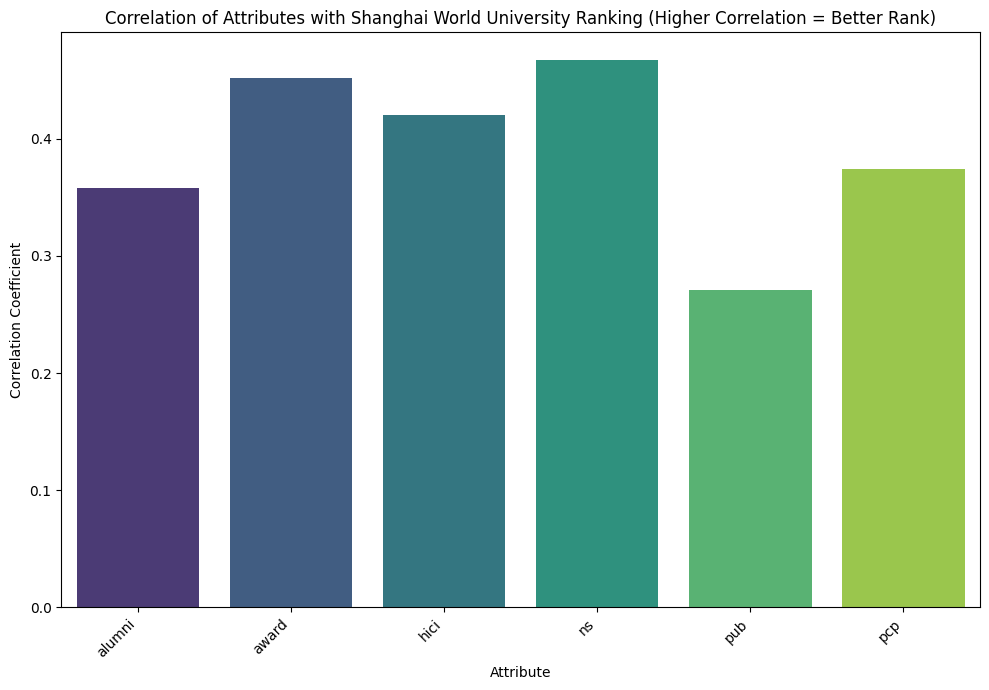

In [ ]:
# Select relevant columns from the Shanghai dataset for correlation
# Exclude non-numeric columns and the year, as 'year' is not a performance indicator
# Removed 'total_score' as requested
shanghai_correlation_columns = ['world_rank', 'alumni', 'award', 'hici', 'ns', 'pub', 'pcp']

# Filter shanghai_df to include only these columns and ensure they are numeric
shanghai_corr_df = shanghai_df[shanghai_correlation_columns].copy()

for col in shanghai_corr_df.columns:
    # Convert columns to numeric, coercing errors to NaN
    shanghai_corr_df[col] = pd.to_numeric(shanghai_corr_df[col], errors='coerce')
    # Fill NaNs with the mean for correlation calculation
    shanghai_corr_df[col] = shanghai_corr_df[col].fillna(shanghai_corr_df[col].mean())

# Calculate the correlation matrix for the Shanghai dataset
shanghai_correlation_matrix = shanghai_corr_df.corr()

# Select correlations with the world rank and flip the sign
# A lower world rank is better, so a positive correlation means a better score
# is associated with a *worse* rank. We flip the sign to make a higher positive
# value indicate a stronger positive impact on rank (i.e., lower rank).
shanghai_world_rank_corr = -shanghai_correlation_matrix['world_rank'].drop('world_rank')

# Define a custom order for better visualization
# Removed 'total_score' as requested
custom_order_shanghai = [
    'alumni', 'award', 'hici', 'ns', 'pub', 'pcp'
]

# Reindex the series according to the custom order
shanghai_world_rank_corr = shanghai_world_rank_corr.reindex(custom_order_shanghai)

# Plot the correlations as a bar chart
plt.figure(figsize=(10, 7))
ax = sns.barplot(x=shanghai_world_rank_corr.index, y=shanghai_world_rank_corr.values, palette='viridis', hue=shanghai_world_rank_corr.index, legend=False)
plt.title('Correlation of Attributes with Shanghai World University Ranking (Higher Correlation = Better Rank)')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Attribute')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

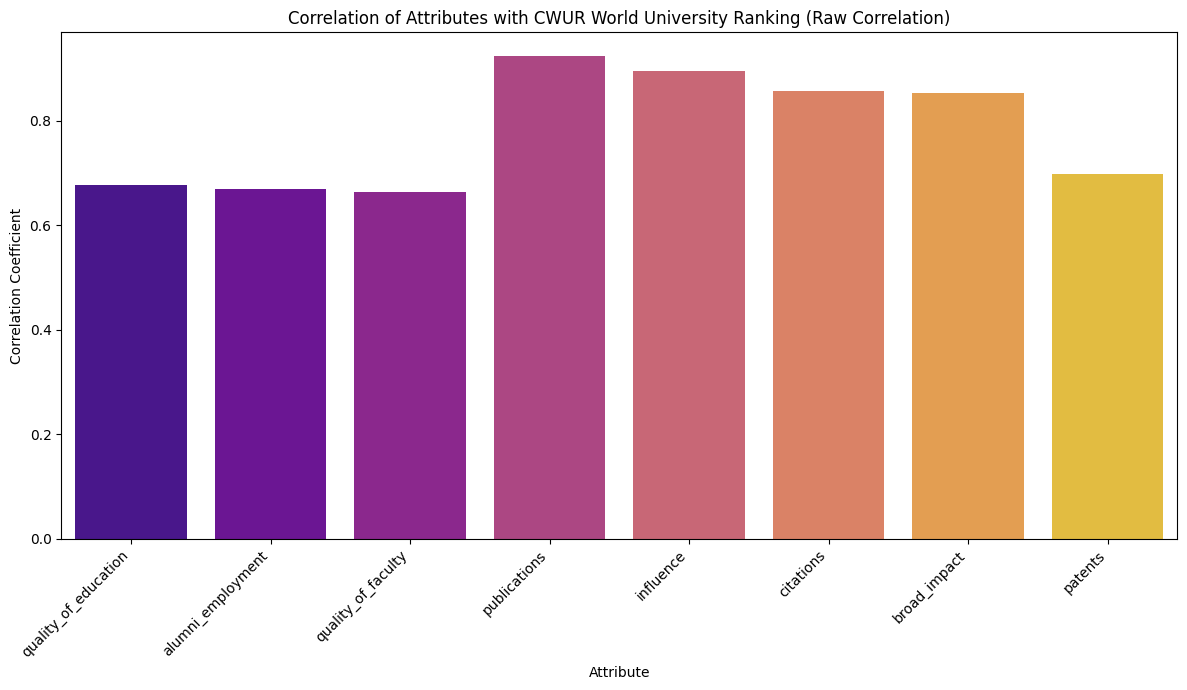

In [ ]:
# Select relevant columns from the CWUR dataset for correlation
# Exclude non-numeric columns like 'institution', 'country', 'national_rank', and 'year'.
# Also exclude 'score' as it's an aggregated metric, similar to how 'total_score' was handled previously.
cwur_correlation_columns = [
    'world_rank', 'quality_of_education', 'alumni_employment',
    'quality_of_faculty', 'publications', 'influence',
    'citations', 'broad_impact', 'patents'
]

# Filter cwur_df to include only these columns and ensure they are numeric
cwur_corr_df = cwur_df[cwur_correlation_columns].copy()

for col in cwur_corr_df.columns:
    # Convert columns to numeric, coercing errors to NaN
    cwur_corr_df[col] = pd.to_numeric(cwur_corr_df[col], errors='coerce')
    # Fill NaNs with the mean for correlation calculation (e.g., for 'broad_impact')
    cwur_corr_df[col] = cwur_corr_df[col].fillna(cwur_corr_df[col].mean())

# Calculate the correlation matrix for the CWUR dataset
cwur_correlation_matrix = cwur_corr_df.corr()

# Select correlations with the world rank, without flipping the sign as requested.
# A positive correlation now means a better score is associated with a *worse* rank.
cwur_world_rank_corr = cwur_correlation_matrix['world_rank'].drop('world_rank')

# Define a custom order for better visualization
custom_order_cwur = [
    'quality_of_education', 'alumni_employment', 'quality_of_faculty',
    'publications', 'influence', 'citations', 'broad_impact', 'patents'
]

# Reindex the series according to the custom order
cwur_world_rank_corr = cwur_world_rank_corr.reindex(custom_order_cwur)

# Plot the correlations as a bar chart
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=cwur_world_rank_corr.index, y=cwur_world_rank_corr.values, palette='plasma', hue=cwur_world_rank_corr.index, legend=False)
plt.title('Correlation of Attributes with CWUR World University Ranking (Raw Correlation)')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Attribute')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Re-obtain the dataset path to ensure it's in scope
path = kagglehub.dataset_download("mylesoneill/world-university-rankings")

# Load the cwurData.csv file
cwur_df = pd.read_csv(os.path.join(path, 'cwurData.csv'))

# Display information about the DataFrame to understand its structure and column names
print(cwur_df.info())

# Display the first few rows to preview the data
display(cwur_df.head())

Using Colab cache for faster access to the 'world-university-rankings' dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
